In [2]:
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling
import pandas as pd

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
data = pd.read_csv('E:/Stony Brook/AMS560/Data/adult.data.txt', sep=", ", encoding='latin1', header=None)
data.columns = ['Age', 'Status', 'Weight', 'Degree', 'Education', 'Married', 'Occupation', 'Relationship', 'Race', 'Sex', 'Gain', 'Loss', 'Hours', 'Country', 'Income']
data = data.apply(LabelEncoder().fit_transform)
dataIncomeColumn = data.Income
data= data.drop('Income', axis=1)
scaler = StandardScaler().fit(data)
standardized_data = scaler.transform(data)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
data_Test = pd.read_csv('E:/Stony Brook/AMS560/Data/adult.test.txt', sep=", ", encoding='latin1', header=None)
data_Test.columns = ['Age', 'Status', 'Weight', 'Degree', 'Education', 'Married', 'Occupation', 'Relationship', 'Race', 'Sex', 'Gain', 'Loss', 'Hours', 'Country', 'Income']
enc = LabelEncoder()
data_Test = data_Test.apply(LabelEncoder().fit_transform)
data_TestIncomeColumn = data_Test.Income
data_Test=data_Test.drop('Income', axis=1)
standardized_test_data = scaler.transform(data_Test)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE

censusIDM = RandomForestClassifier(max_depth=3, random_state=0)
rfe = RFE(censusIDM, n_features_to_select=6)
#rfe.fit(standardized_data, dataIncomeColumn)
#rfe.score(standardized_test_data, data_TestIncomeColumn)

In [8]:
#Using the Random Forest Classifier on our Data, with depth 3.
depth=3;
censusIDM = RandomForestClassifier(max_depth=depth, random_state=0)
frfe = RFE(censusIDM, n_features_to_select=3)
frfe.fit(standardized_data, dataIncomeColumn)
print(frfe.ranking_)
frfe.score(standardized_test_data, data_TestIncomeColumn)

[ 3  9 12  5  1  2  8  1 11  6  1  7  4 10]


0.8367422148516676

In [14]:
data.columns[3]

'Degree'

In [ ]:
feature_to_select=[0]*2
j=0
for i in range(len(frfe.ranking_)):
    if frfe.ranking_[i]==1:
        feature_to_select[j]=i
print(feature_to_select)

0.8050488299244518
0.7637737239727289
0.8050488299244518


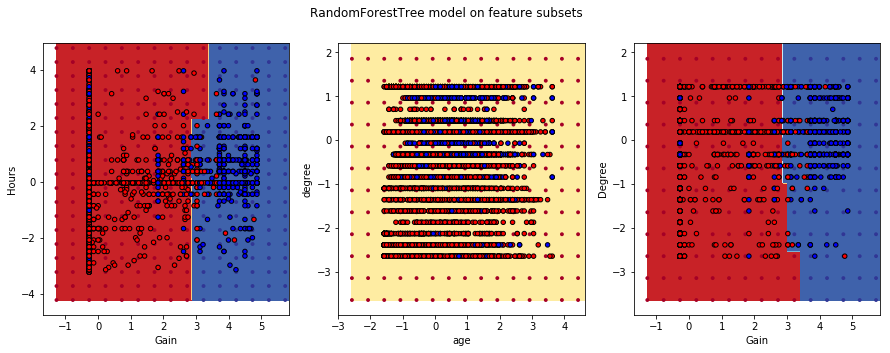

In [22]:
# Parameters
n_classes = 2
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

fig=plt.figure(figsize=[15,5])
plt.subplot(1,3, 1)

f1=[10,12]
f2=[0,3]
f3=[10,3]

y_train=dataIncomeColumn
standard_data=standardized_test_data
y_test=data_TestIncomeColumn


#X=standardized_test_data[:,[0,4]];
X=standard_data[:,f1];
y=y_test

frfe.fit(X, y)
print(frfe.score(standard_data[:,f1], y_test))

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = frfe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = frfe.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
xlabel('Gain')
ylabel('Hours')


plt.subplot(1,3,2)
X=standard_data[:,f2];

frfe.fit(X, y)
print(frfe.score(standard_data[:,f2], y_test))

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = frfe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = frfe.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
xlabel('age')
ylabel('degree')


plt.subplot(1,3,3)
X=standard_data[:,f3];

frfe.fit(X, y)
print(frfe.score(standard_data[:,f3], y_test))

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = frfe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = frfe.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
xlabel('Gain')
ylabel('Degree')

plt.suptitle('RandomForestTree model on feature subsets ');

#fig.savefig('RandomForest.pdf',dpi=200)